DECISION-TREE

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/data/Chennai_1990_2022_Madras.csv')

In [3]:
# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'], format='%d-%m-%Y')

# Generate lag and rolling features for 'prcp'
data['prcp_lag1'] = data['prcp'].shift(1)
data['prcp_lag2'] = data['prcp'].shift(2)
data['prcp_rolling_mean'] = data['prcp'].rolling(window=7).mean()

In [4]:
# Extract time-based features
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day_of_year'] = data['time'].dt.dayofyear
data['day_of_week'] = data['time'].dt.dayofweek

# Drop rows with missing values
data.dropna(inplace=True)

In [5]:
# Define features and target variable
X = data[['tavg', 'tmin', 'tmax', 'prcp_lag1', 'prcp_lag2', 'prcp_rolling_mean', 'month', 'day_of_year', 'day_of_week']]
y = data['prcp']




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,5,10,20]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')

In [7]:
# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

In [8]:
# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mean Absolute Error (MAE): 4.812230495796676
Mean Squared Error (MSE): 178.18617302891147
Root Mean Squared Error (RMSE): 13.348639369947465
R-squared: 0.28658715896228326


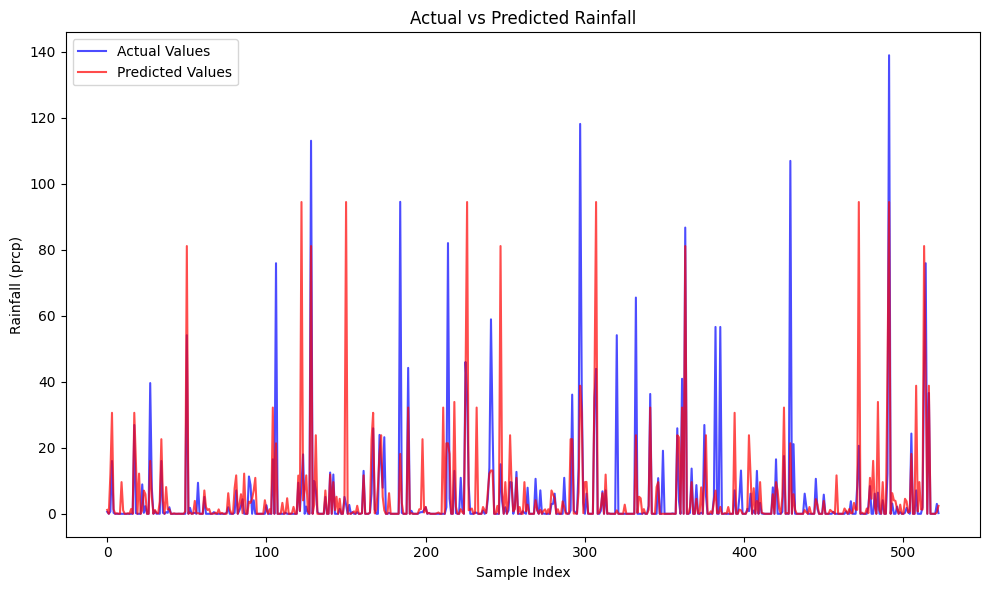

In [9]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='b', alpha=0.7, linewidth=1.5)
plt.plot(y_pred, label='Predicted Values', color='r', alpha=0.7, linewidth=1.5)
plt.xlabel('Sample Index')
plt.ylabel('Rainfall (prcp)')
plt.title('Actual vs Predicted Rainfall')
plt.legend()

plt.tight_layout()
plt.show()